<h1><font color='blue'>Geog573, Lab_03:</font></h1>  <h3>Data Processing Using Covid 19 positive cases data in dane county,WI geographic location </h3>

In [ ]:
#import required libraries

import pandas as pd
import geopandas as gpd
import json

In [ ]:
# load covid 19 census tract geojson file

with open('COVID-19_Data_by_Census_Tract.geojson','r') as covid_file:
    covidfile_geojson = json.load(covid_file)

# covert geojson file to csv
covid_file = pd.json_normalize(covidfile_geojson['features'])
covid_file.to_csv('covid_data.csv', index =False)

# read csv file
covid_data = pd.read_csv('covid_data.csv')

# create DataFrame from the CSV file
covid_data = pd.DataFrame(covid_data)
covid_data.head()

# create another data frame with columns, [ct,date,positive] and match them with csv file data values of geoid,date,positve
covid_df = pd.DataFrame({"ct": covid_data['properties.GEOID'], "date": covid_data['properties.DATE'], "positive": covid_data['properties.POSITIVE']}, columns=["ct", "date", "positive"])
covid_df.head()

In [ ]:
covid_data = []
for feature in covidfile_geojson['features']:
    positive=feature['properties']['POSITIVE']
    ct =feature['properties']['GEOID']
    date =feature['properties']['DATE']
    
    covid_data.append([ct,date,positive])

In [ ]:
covid_df = pd.DataFrame(covid_data, columns=['ct','date','positive'])
covid_df.head()

,ct,date,positive
0,55009940002,2021-12-08T20:00:00Z,789
1,55009001600,2021-12-08T20:00:00Z,1223
2,55009001801,2021-12-08T20:00:00Z,878
3,55009001802,2021-12-08T20:00:00Z,764
4,55009002001,2021-12-08T20:00:00Z,1520


In [ ]:
# to get only county number from the geoid number
covid_df["county"] = covid_df["ct"].apply(lambda x: str(x).zfill(11)[:5])  # the values are not chnaging with change of zfill value? threfore why only 11?
covid_df.head()
#covid_df.describe()
#covid_df['positive'].median()

,ct,date,positive,county
0,55009940002,2021-12-08T20:00:00Z,789,55009
1,55009001600,2021-12-08T20:00:00Z,1223,55009
2,55009001801,2021-12-08T20:00:00Z,878,55009
3,55009001802,2021-12-08T20:00:00Z,764,55009
4,55009002001,2021-12-08T20:00:00Z,1520,55009


In [ ]:
# create definition function to impliment values with high and low rate risk factor
# here i'm taking median vaule as x, therefore above x is high and below x is low
def riskfactor(x):
    if x > 594:
        return 'high'
    else:
        return 'low'

covid_df['risk'] = covid_df['positive'].apply(lambda x: riskfactor(x))
covid_df.tail()


,ct,date,positive,county,risk
1388,55043960100,2021-12-08T20:00:00Z,510,55043,low
1389,55043960500,2021-12-08T20:00:00Z,479,55043,low
1390,55043961100,2021-12-08T20:00:00Z,658,55043,high
1391,55043960600,2021-12-08T20:00:00Z,455,55043,low
1392,TRACT N/A,2021-12-08T20:00:00Z,20630,00TRA,high


<h3><font color='blue'>Load ZCTA file</font></h3>

In [ ]:
zcta_dane = gpd.read_file('ZCTAs_DaneCounty/ZCTAs_DaneCounty.shp')
zcta_dane = zcta_dane.rename({'ZCTA5CE10': 'ZCTA5'}, axis =1)
zcta_dane.head()
#zcta_dane.plot()

,ZCTA5,ALAND10,AWATER10,geometry
0,53792,54498,0,"POLYGON ((-89.43192 43.07882, -89.43091 43.078..."
1,53583,197458833,9421762,"MULTIPOLYGON (((-89.92825 43.26930, -89.92762 ..."
2,53911,92481870,819539,"POLYGON ((-89.44271 43.32252, -89.44263 43.337..."
3,53571,1059152,0,"POLYGON ((-89.36308 43.28130, -89.34449 43.281..."
4,53715,3133139,503,"POLYGON ((-89.40899 43.06206, -89.40899 43.070..."


<h3><font color='blue'>Load Relationship file between ZCTA and CT</font></h3>

In [ ]:
zcta_ct_relationship = pd.read_table('zcta_tract_rel_10.txt', sep = ',')
print(zcta_ct_relationship.columns)
zcta_ct_relationship.head()

Index(['ZCTA5', 'STATE', 'COUNTY', 'TRACT', 'GEOID', 'POPPT', 'HUPT', 'AREAPT',
       ' AREALANDPT', 'ZPOP', 'ZHU', 'ZAREA', 'ZAREALAND', 'TRPOP', 'TRHU',
       'TRAREA', 'TRAREALAND', 'ZPOPPCT', 'ZHUPCT', 'ZAREAPCT', 'ZAREALANDPCT',
       'TRPOPPCT', 'TRHUPCT', 'TRAREAPCT', 'TRAREALANDPCT'],
      dtype='object')


,ZCTA5,STATE,COUNTY,TRACT,GEOID,POPPT,HUPT,AREAPT,AREALANDPT,ZPOP,...,TRAREA,TRAREALAND,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT
0,601,72,1,956300,72001956300,4271,1706,44663250,44572589,18570,...,44924558,44833897,23.00,22.03,26.67,26.74,98.5,98.33,99.42,99.42
1,601,72,1,956400,72001956400,2384,1037,32830481,32492074,18570,...,37782601,37191697,12.84,13.39,19.61,19.50,79.6,80.14,86.89,87.36
2,601,72,1,956500,72001956500,3126,1240,44969548,44809680,18570,...,44969548,44809680,16.83,16.01,26.85,26.89,100.0,100.00,100.00,100.00
3,601,72,1,956600,72001956600,2329,972,1981101,1981101,18570,...,1981101,1981101,12.54,12.55,1.18,1.19,100.0,100.00,100.00,100.00
4,601,72,1,956700,72001956700,2053,948,1380041,1380041,18570,...,1380041,1380041,11.06,12.24,0.82,0.83,100.0,100.00,100.00,100.00


In [ ]:
zcta_ct_relationship['ct'] = zcta_ct_relationship['GEOID'].apply(lambda x: str(x).zfill(11))
zcta_ct_relationship['county'] = zcta_ct_relationship['GEOID'].apply(lambda x: str(x)[:5])
zcta_ct_relationship['ZCTA5'] = zcta_ct_relationship['ZCTA5'].apply(lambda x: str(x).zfill(3))
zcta_ct_relationship.head()

,ZCTA5,STATE,COUNTY,TRACT,GEOID,POPPT,HUPT,AREAPT,AREALANDPT,ZPOP,...,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT,ct,county
0,601,72,1,956300,72001956300,4271,1706,44663250,44572589,18570,...,23.00,22.03,26.67,26.74,98.5,98.33,99.42,99.42,72001956300,72001
1,601,72,1,956400,72001956400,2384,1037,32830481,32492074,18570,...,12.84,13.39,19.61,19.50,79.6,80.14,86.89,87.36,72001956400,72001
2,601,72,1,956500,72001956500,3126,1240,44969548,44809680,18570,...,16.83,16.01,26.85,26.89,100.0,100.00,100.00,100.00,72001956500,72001
3,601,72,1,956600,72001956600,2329,972,1981101,1981101,18570,...,12.54,12.55,1.18,1.19,100.0,100.00,100.00,100.00,72001956600,72001
4,601,72,1,956700,72001956700,2053,948,1380041,1380041,18570,...,11.06,12.24,0.82,0.83,100.0,100.00,100.00,100.00,72001956700,72001


### join ZCTA_relationship and ZCTA_dane to aggregate number of confirmed cases from ct to ZCTA

In [ ]:
zcta_rel_dane = pd.merge(left = zcta_dane, right= zcta_ct_relationship, on = 'ZCTA5')
zcta_rel_dane.head()

,ZCTA5,ALAND10,AWATER10,geometry,STATE,COUNTY,TRACT,GEOID,POPPT,HUPT,...,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT,ct,county
0,53792,54498,0,"POLYGON ((-89.43192 43.07882, -89.43091 43.078...",55,25,3200,55025003200,0,0,...,0.00,0.00,100.00,100.00,0.00,0.00,2.15,2.20,55025003200,55025
1,53583,197458833,9421762,"MULTIPOLYGON (((-89.92825 43.26930, -89.92762 ...",55,21,970800,55021970800,53,61,...,0.92,2.45,0.20,0.14,0.95,2.27,0.33,0.23,55021970800,55021
2,53583,197458833,9421762,"MULTIPOLYGON (((-89.92825 43.26930, -89.92762 ...",55,25,12900,55025012900,1442,578,...,25.09,23.21,32.93,33.50,38.49,35.14,27.81,27.56,55025012900,55025
3,53583,197458833,9421762,"MULTIPOLYGON (((-89.92825 43.26930, -89.92762 ...",55,25,13100,55025013100,14,6,...,0.24,0.24,0.11,0.12,0.31,0.30,0.18,0.18,55025013100,55025
4,53583,197458833,9421762,"MULTIPOLYGON (((-89.92825 43.26930, -89.92762 ...",55,111,600,55111000600,974,403,...,16.95,16.18,10.94,11.45,14.81,14.25,10.43,10.47,55111000600,55111


In [ ]:
zcta_ct_cases_dane = zcta_rel_dane.merge(covid_df, on="ct")
zcta_ct_cases_dane.head()
#zcta_ct_cases_dane.to_csv('zcta_ct_cases_dane.csv', index=False)
#zcta_ct_cases_dane.columns

,ZCTA5,ALAND10,AWATER10,geometry,STATE,COUNTY,TRACT,GEOID,POPPT,HUPT,...,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT,ct,county_x,date,positive,county_y,risk
0,53792,54498,0,"POLYGON ((-89.43192 43.07882, -89.43091 43.078...",55,25,3200,55025003200,0,0,...,0.00,0.00,2.15,2.20,55025003200,55025,2021-12-08T20:00:00Z,91,55025,low
1,53726,1288408,0,"POLYGON ((-89.42899 43.06798, -89.42864 43.068...",55,25,3200,55025003200,0,0,...,0.00,0.00,5.20,5.32,55025003200,55025,2021-12-08T20:00:00Z,91,55025,low
2,53705,17032642,63779,"POLYGON ((-89.50228 43.06842, -89.49670 43.068...",55,25,3200,55025003200,2778,1256,...,100.00,100.00,92.65,92.47,55025003200,55025,2021-12-08T20:00:00Z,91,55025,low
3,53583,197458833,9421762,"MULTIPOLYGON (((-89.92825 43.26930, -89.92762 ...",55,21,970800,55021970800,53,61,...,0.95,2.27,0.33,0.23,55021970800,55021,2021-12-08T20:00:00Z,706,55021,high
4,53555,206488661,17807584,"POLYGON ((-89.69497 43.31036, -89.69503 43.321...",55,21,970800,55021970800,4858,2335,...,86.67,86.74,87.75,88.71,55021970800,55021,2021-12-08T20:00:00Z,706,55021,high


In [ ]:
# weighted confirmed cases can be computed as
zcta_ct_cases_dane["pop_weighted_positive"] = (zcta_ct_cases_dane['positive']) * (zcta_ct_cases_dane["TRPOPPCT"] / 100)
zcta_ct_cases_dane["pop_weighted_positive"] = zcta_ct_cases_dane["pop_weighted_positive"].astype(int)
zcta_ct_cases_dane["area_weighted_positive"] = (zcta_ct_cases_dane['positive']) * (zcta_ct_cases_dane["TRAREAPCT"] / 100)
zcta_ct_cases_dane["area_weighted_positive"] = zcta_ct_cases_dane["area_weighted_positive"].astype(int)


# Compute the weighted confirmed cases at the ZCTA level
zcta_cases_dane = zcta_ct_cases_dane.groupby("ZCTA5").sum()['pop_weighted_positive']


In [ ]:
zcta_ct_cases_dane.dtypes

ZCTA5                       object
ALAND10                      int64
AWATER10                     int64
geometry                  geometry
STATE                        int64
COUNTY                       int64
TRACT                        int64
GEOID                        int64
POPPT                        int64
HUPT                         int64
AREAPT                       int64
 AREALANDPT                  int64
ZPOP                         int64
ZHU                          int64
ZAREA                        int64
ZAREALAND                    int64
TRPOP                        int64
TRHU                         int64
TRAREA                       int64
TRAREALAND                   int64
ZPOPPCT                    float64
ZHUPCT                     float64
ZAREAPCT                   float64
ZAREALANDPCT               float64
TRPOPPCT                   float64
TRHUPCT                    float64
TRAREAPCT                  float64
TRAREALANDPCT              float64
ct                  

In [ ]:
zcta_ct_cases_dane.shape
zcta_ct_cases_dane.head()


,ZCTA5,ALAND10,AWATER10,geometry,STATE,COUNTY,TRACT,GEOID,POPPT,HUPT,...,TRAREAPCT,TRAREALANDPCT,ct,county_x,date,positive,county_y,risk,pop_weighted_positive,area_weighted_positive
0,53792,54498,0,"POLYGON ((-89.43192 43.07882, -89.43091 43.078...",55,25,3200,55025003200,0,0,...,2.15,2.20,55025003200,55025,2021-12-08T20:00:00Z,91,55025,low,0,1
1,53726,1288408,0,"POLYGON ((-89.42899 43.06798, -89.42864 43.068...",55,25,3200,55025003200,0,0,...,5.20,5.32,55025003200,55025,2021-12-08T20:00:00Z,91,55025,low,0,4
2,53705,17032642,63779,"POLYGON ((-89.50228 43.06842, -89.49670 43.068...",55,25,3200,55025003200,2778,1256,...,92.65,92.47,55025003200,55025,2021-12-08T20:00:00Z,91,55025,low,91,84
3,53583,197458833,9421762,"MULTIPOLYGON (((-89.92825 43.26930, -89.92762 ...",55,21,970800,55021970800,53,61,...,0.33,0.23,55021970800,55021,2021-12-08T20:00:00Z,706,55021,high,6,2
4,53555,206488661,17807584,"POLYGON ((-89.69497 43.31036, -89.69503 43.321...",55,21,970800,55021970800,4858,2335,...,87.75,88.71,55021970800,55021,2021-12-08T20:00:00Z,706,55021,high,611,619


A:\Softwares\anaconda3\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

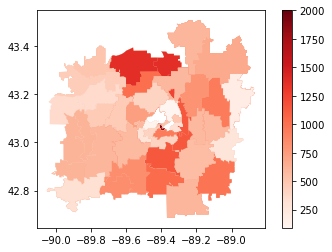

In [ ]:
zcta_ct_cases_dane.plot(zcta_ct_cases_dane['positive'], cmap ='Reds', legend = True)

In [ ]:
# to find correlation between the values pop_weighted_positive & area_weighted_positive
zcta_ct_cases_dane[['pop_weighted_positive', 'area_weighted_positive']].corr()


,pop_weighted_positive,area_weighted_positive
pop_weighted_positive,1.000000,0.947413
area_weighted_positive,0.947413,1.000000


In [ ]:
# zcta_cases_dane = zcta_ct_cases_dane.round(decimals=4)

In [25]:
zcta_cases_dane.to_csv('ramakrishna_raju_ZCTA_positive.csv')

<h1><font color='blue'>Task 2</font></h1>

In [33]:
import wget
import os

In [ ]:
for i in range(20):
    url = "https://raw.githubusercontent.com/GeoDS/COVID19USFlows-WeeklyFlows-Ct2021/master/weekly_flows/ct2ct/2021_10_25/weekly_ct2ct_2021_10_25_"+str(i)+".csv"
    wget.download(url)

In [46]:
flow_all = []
for file in os.listdir('Weekly_flow_data_oct_25_2021'):
    if file[-3:] == "csv":
        flow_df = pd.read_csv(os.path.join('Weekly_flow_data_oct_25_2021', file))
        flow_all.append(flow_df)
result = pd.concat([x for x in flow_all])
result.to_csv("weekly_ct2ct_2021_10_025.csv", index=False)
result.head()

,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,number_devices_primary_daytime,date_range,visitor_flows,pop_flows
0,1001020100,1001020100,-86.490076,32.477185,-86.490076,32.477185,215,10/25/21 - 10/31/21,22,208.0
1,1001020100,1001020200,-86.490076,32.477185,-86.473375,32.474248,215,10/25/21 - 10/31/21,95,900.0
2,1001020100,1001020300,-86.490076,32.477185,-86.460190,32.475428,215,10/25/21 - 10/31/21,184,1744.0
3,1001020100,1001020400,-86.490076,32.477185,-86.443624,32.472001,215,10/25/21 - 10/31/21,67,635.0
4,1001020100,1001020500,-86.490076,32.477185,-86.422661,32.458833,215,10/25/21 - 10/31/21,418,3963.0


In [47]:
df = pd.read_csv('weekly_ct2ct_2021_10_025.csv') 

In [ ]:
df.head()

,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,number_devices_primary_daytime,date_range,visitor_flows,pop_flows
0,36047059100,36047050900,-73.942934,40.72353,-73.950565,40.703277,40,10/25/21 - 10/31/21,4,292.0
1,36047059100,36047052700,-73.942934,40.72353,-73.953695,40.708400,40,10/25/21 - 10/31/21,4,292.0
2,36047059100,42079200100,-73.942934,40.72353,-75.885391,41.247734,40,10/25/21 - 10/31/21,4,292.0
3,36047059100,36081022001,-73.942934,40.72353,-73.820664,40.713635,40,10/25/21 - 10/31/21,4,292.0
4,36047059100,36081020500,-73.942934,40.72353,-73.921804,40.730389,40,10/25/21 - 10/31/21,4,292.0


In [50]:
headers = list(df.columns.values)
for header in headers:
    df[header] = df[header].astype(str)
df.dtypes

geoid_o                           object
geoid_d                           object
lng_o                             object
lat_o                             object
lng_d                             object
lat_d                             object
number_devices_primary_daytime    object
date_range                        object
visitor_flows                     object
pop_flows                         object
dtype: object

In [51]:
df['visitor_flows'] = df['visitor_flows'].astype(int)

In [52]:
df['county_o'] = df['geoid_o'].apply(lambda x: str(x).zfill(11)[:5])
df['county_d'] = df['geoid_d'].apply(lambda x: str(x).zfill(11)[:5])
df = df[(df['county_o'] == '55025') & (df['county_d'] == '55025')]
df = df.drop(columns = ['county_o', 'county_d'])
df.head(1)

,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,number_devices_primary_daytime,date_range,visitor_flows,pop_flows
132206,55025001606,55025001101,-89.39563377323925,43.07013932453127,-89.40739082614674,43.070562601658,455,10/25/21 - 10/31/21,1093,14384.0


In [53]:
zcta_ct_cases_dane.head(1)

,ZCTA5,ALAND10,AWATER10,geometry,STATE,COUNTY,TRACT,GEOID,POPPT,HUPT,...,TRAREAPCT,TRAREALANDPCT,ct,county_x,date,positive,county_y,risk,pop_weighted_positive,area_weighted_positive
0,53792,54498,0,"POLYGON ((-89.43192 43.07882, -89.43091 43.078...",55,25,3200,55025003200,0,0,...,2.15,2.2,55025003200,55025,2021-12-08T20:00:00Z,91,55025,low,0,1


In [54]:
zcta_df = pd.merge(left = df, right = zcta_rel_dane, left_on = 'geoid_o', right_on = 'ct')
zcta_df = pd.merge(left = zcta_df, right = zcta_rel_dane, left_on = 'geoid_d', right_on = 'ct')

In [55]:
zcta_df.columns

Index(['geoid_o', 'geoid_d', 'lng_o', 'lat_o', 'lng_d', 'lat_d',
       'number_devices_primary_daytime', 'date_range', 'visitor_flows',
       'pop_flows', 'ZCTA5_x', 'ALAND10_x', 'AWATER10_x', 'geometry_x',
       'STATE_x', 'COUNTY_x', 'TRACT_x', 'GEOID_x', 'POPPT_x', 'HUPT_x',
       'AREAPT_x', ' AREALANDPT_x', 'ZPOP_x', 'ZHU_x', 'ZAREA_x',
       'ZAREALAND_x', 'TRPOP_x', 'TRHU_x', 'TRAREA_x', 'TRAREALAND_x',
       'ZPOPPCT_x', 'ZHUPCT_x', 'ZAREAPCT_x', 'ZAREALANDPCT_x', 'TRPOPPCT_x',
       'TRHUPCT_x', 'TRAREAPCT_x', 'TRAREALANDPCT_x', 'ct_x', 'county_x',
       'ZCTA5_y', 'ALAND10_y', 'AWATER10_y', 'geometry_y', 'STATE_y',
       'COUNTY_y', 'TRACT_y', 'GEOID_y', 'POPPT_y', 'HUPT_y', 'AREAPT_y',
       ' AREALANDPT_y', 'ZPOP_y', 'ZHU_y', 'ZAREA_y', 'ZAREALAND_y', 'TRPOP_y',
       'TRHU_y', 'TRAREA_y', 'TRAREALAND_y', 'ZPOPPCT_y', 'ZHUPCT_y',
       'ZAREAPCT_y', 'ZAREALANDPCT_y', 'TRPOPPCT_y', 'TRHUPCT_y',
       'TRAREAPCT_y', 'TRAREALANDPCT_y', 'ct_y', 'county_y'],
      d

In [56]:
def visitor_pct(visitor_flows, TRPOPPCT_x, TRPOPPCT_y):
    return (visitor_flows)* (TRPOPPCT_x/100)* (TRPOPPCT_y/100)

zcta_df['visitor_flows_x'] = zcta_df.apply(lambda x: visitor_pct(x['visitor_flows'], x['TRPOPPCT_x'], x['TRPOPPCT_y']), axis=1)
zcta_df['visitor_flows_x'] = zcta_df['visitor_flows_x'].astype(int)


In [57]:
zcta_flow = zcta_df.groupby(['ZCTA5_x', 'ZCTA5_y']).sum()['visitor_flows_x']
zcta_flow.to_csv('ramakrishna_raju_feb13_zcta_flow.csv')

### End of Code

zcta = {}
for each_orgin in zips:
    for each destin in zips:
        zcta_reltionship
        ct_each_orgin = ct_o_intesect
        ct_each destin  = ct_d_intersect
        zip_flows[(each_orgin, each_destin)] = cts_o_intersect[0] *ct_d_intersect(0)*zcta_eachorgin_*toppt